# Part 1- Import Necessary Libraries and Check Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
plt.style.use('ggplot')
import os
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score, explained_variance_score,median_absolute_error, mean_squared_error, mean_absolute_error

In [2]:
dataset = pd.read_csv("/Users/berk.erol/Desktop/EuropeanSales.csv",delimiter=',')

In [3]:
cwd = os.getcwd()
cwd

'/Users/berk.erol/Desktop/Bahçeşehir Big Data Courses/Second Semester/BDA5002-Marketing Analytics/Week 1'

In [4]:
dataset.head()

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            21 non-null     object 
 1   Population         21 non-null     float64
 2   GDPperHead         21 non-null     float64
 3   UnemploymentRate   21 non-null     float64
 4   EducationSpending  21 non-null     float64
 5   SalesPerCapita     21 non-null     int64  
 6   ComputerSales      21 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ KB


In [6]:
print(dataset.columns)

Index(['Country', 'Population', 'GDPperHead', 'UnemploymentRate',
       'EducationSpending', 'SalesPerCapita', 'ComputerSales'],
      dtype='object')


In [7]:
print(dataset.dtypes)

Country               object
Population           float64
GDPperHead           float64
UnemploymentRate     float64
EducationSpending    float64
SalesPerCapita         int64
ComputerSales          int64
dtype: object


In [8]:
dataset.describe()

,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,26.723810,36.973810,8.100000,5.180952,115.333333,2492.809524
std,26.128929,18.654496,3.122979,1.269889,78.970459,2499.807965
min,4.400000,6.550000,3.600000,3.300000,20.000000,154.000000
25%,8.400000,20.670000,6.300000,4.400000,68.000000,813.000000
50%,10.700000,43.540000,7.300000,5.000000,101.000000,1682.000000
75%,44.800000,51.320000,9.900000,5.800000,151.000000,2879.000000
max,82.500000,64.430000,14.400000,8.400000,372.000000,9887.000000


In [9]:
print(dataset.isnull().sum()) # I looked for the null values

Country              0
Population           0
GDPperHead           0
UnemploymentRate     0
EducationSpending    0
SalesPerCapita       0
ComputerSales        0
dtype: int64


# Part 2 - Make Explanotary Data Analysis and Proceed with Preprocessing Steps

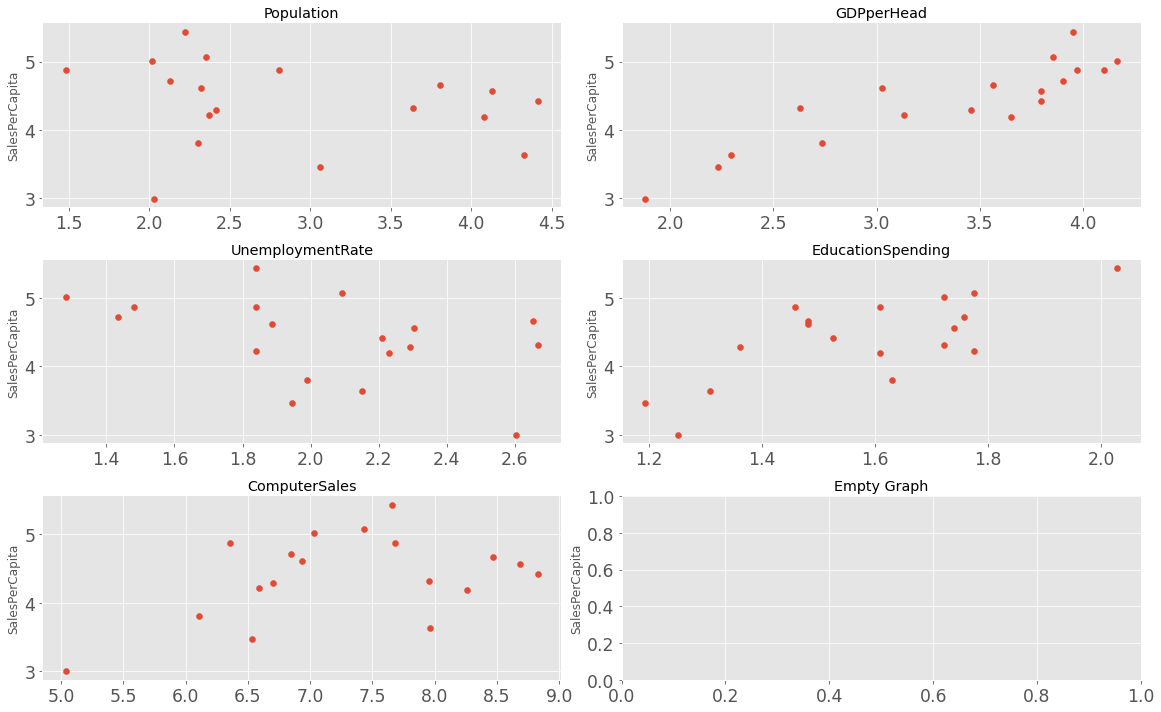

In [119]:
# I examined the linearity between SalesPerCapita and the other five features; Population, GDPperHead,
# EducationSpending,UnemploymentRate and ComputerSales
fig,axs = plt.subplots(3,2)
rcParams['figure.figsize'] = 16,10
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'
axs[0,0].scatter(dataset["Population"], dataset["SalesPerCapita"])
axs[0,0].set_title("Population")
axs[0,1].scatter(dataset["GDPperHead"], dataset["SalesPerCapita"])
axs[0,1].set_title("GDPperHead")
axs[1,0].scatter(dataset["UnemploymentRate"], dataset["SalesPerCapita"])
axs[1,0].set_title("UnemploymentRate")
axs[1,1].scatter(dataset["EducationSpending"], dataset["SalesPerCapita"])
axs[1,1].set_title("EducationSpending")
axs[2,0].scatter(dataset["ComputerSales"], dataset["SalesPerCapita"])
axs[2,0].set_title("ComputerSales")
axs[2,1].set_title("Empty Graph")
fig.tight_layout()
for ax in axs.flat:
    ax.set(ylabel='SalesPerCapita')

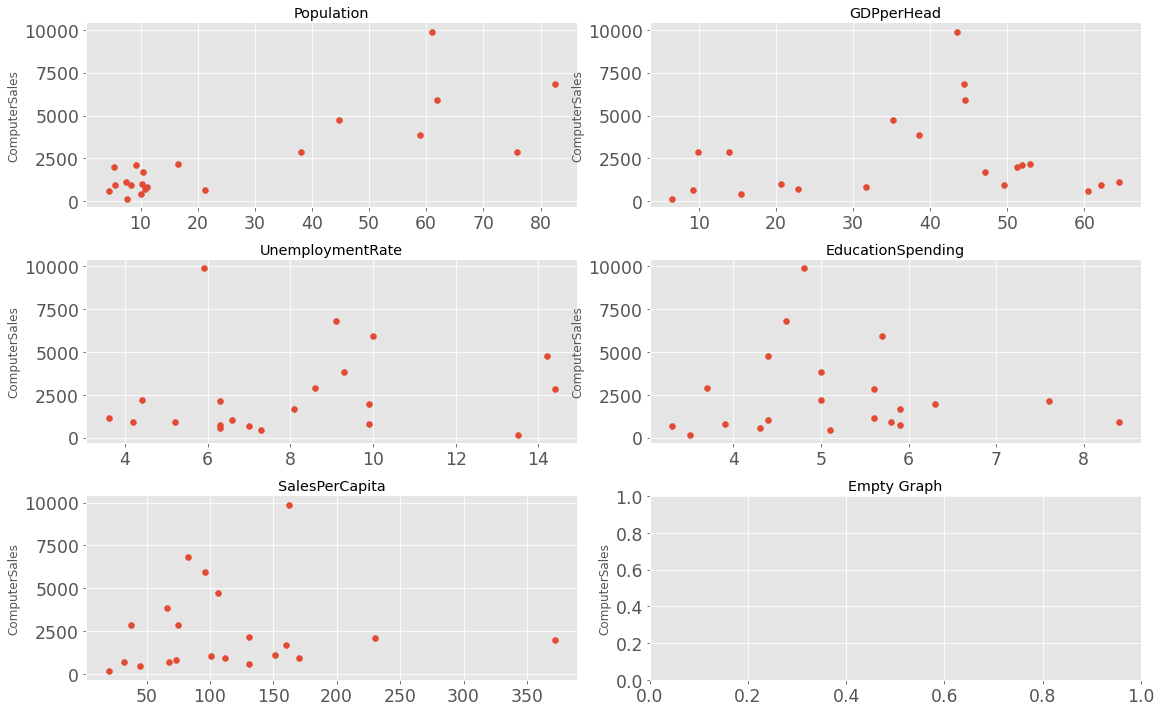

In [11]:
# I examined the linearity between ComputerSales and the other five features; Population, GDPperHead,
# EducationSpending,UnemploymentRate and SalesPerCapita
fig,axs = plt.subplots(3,2)
rcParams['figure.figsize'] = 16,10
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'
axs[0,0].scatter(dataset["Population"], dataset["ComputerSales"])
axs[0,0].set_title("Population")
axs[0,1].scatter(dataset["GDPperHead"], dataset["ComputerSales"])
axs[0,1].set_title("GDPperHead")
axs[1,0].scatter(dataset["UnemploymentRate"], dataset["ComputerSales"])
axs[1,0].set_title("UnemploymentRate")
axs[1,1].scatter(dataset["EducationSpending"], dataset["ComputerSales"])
axs[1,1].set_title("EducationSpending")
axs[2,0].scatter(dataset["SalesPerCapita"], dataset["ComputerSales"])
axs[2,0].set_title("SalesPerCapita")
axs[2,1].set_title("Empty Graph")
fig.tight_layout()
for ax in axs.flat:
    ax.set(ylabel='ComputerSales')

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<AxesSubplot:xlabel='EducationSpending', ylabel='Density'>

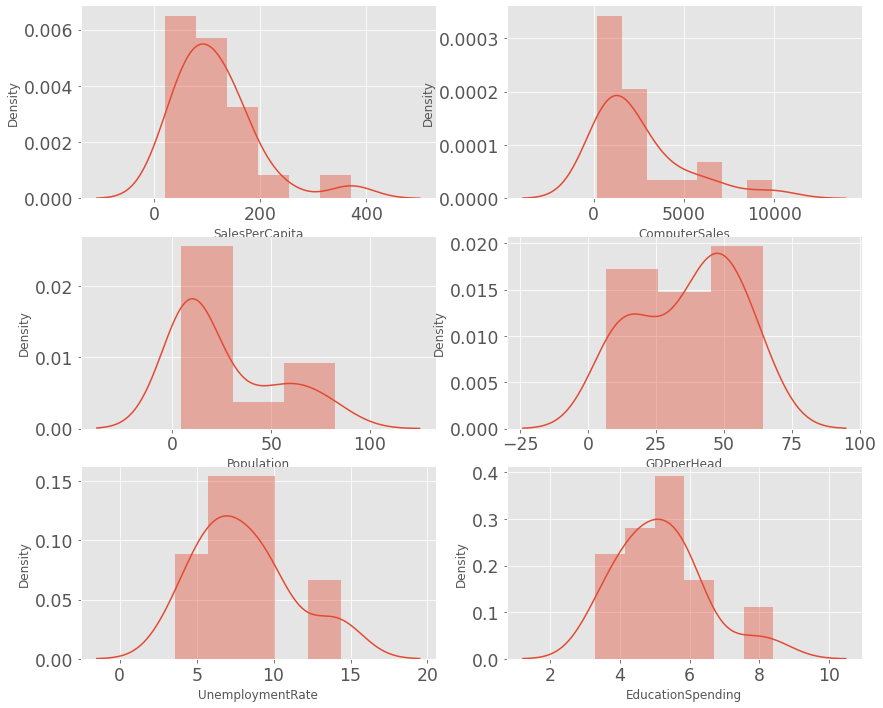

In [12]:
#I also looked for the distribution of these variables.
plt.figure(figsize = (14,12))

plt.subplot(3,2,1)
sns.distplot(dataset['SalesPerCapita'])

plt.subplot(3,2,2)
sns.distplot(dataset['ComputerSales'])

plt.subplot(3,2,3)
sns.distplot(dataset['Population'])

plt.subplot(3,2,4)
sns.distplot(dataset['GDPperHead'])

plt.subplot(3,2,5)
sns.distplot(dataset['UnemploymentRate'])

plt.subplot(3,2,6)
sns.distplot(dataset['EducationSpending'])

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [13]:
dataset.skew() # So I found the skewness of each feature.

Population           1.045463
GDPperHead          -0.294859
UnemploymentRate     0.720345
EducationSpending    0.850790
SalesPerCapita       1.812854
ComputerSales        1.704270
dtype: float64

In [14]:
dataset.var() #I also wanted to look for the varianca; so I could apply normalization on the dataset.

Population           6.827209e+02
GDPperHead           3.479902e+02
UnemploymentRate     9.753000e+00
EducationSpending    1.612619e+00
SalesPerCapita       6.236333e+03
ComputerSales        6.249040e+06
dtype: float64

In [15]:
dataset.drop("Country",axis=1,inplace=True) #For normalization purposes, all of the variables must be numerical.

AxesSubplot(0.125,0.125;0.775x0.755)


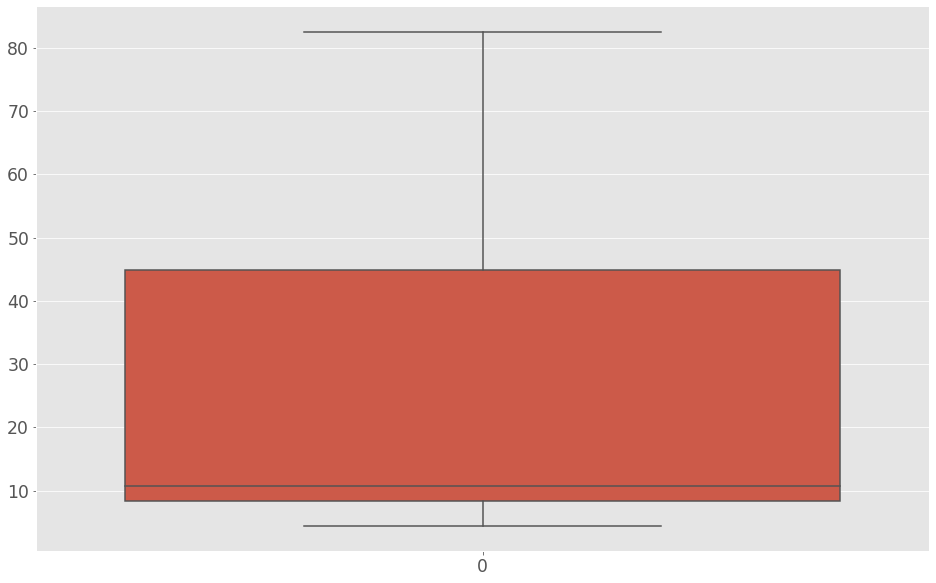

In [16]:
dataset_pop = dataset['Population'] #For all the featues, I dropped the outliers; 
#because they have many effects on base assumptions in Linear Models.
print(sns.boxplot(data=dataset_pop))

In [17]:
Q1 = dataset.Population.quantile(q=0.25)
Q3 = dataset.Population.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['Population'] > lower_bound) & (dataset['Population'] < upper_bound)]
dataset.shape

(21, 6)

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


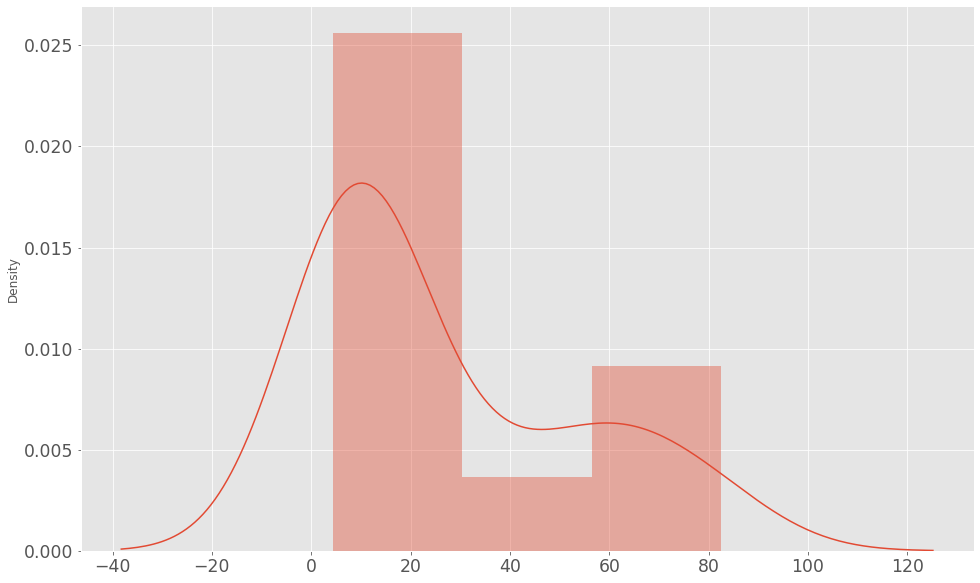

In [18]:
sns.distplot(x=dataset['Population'])
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


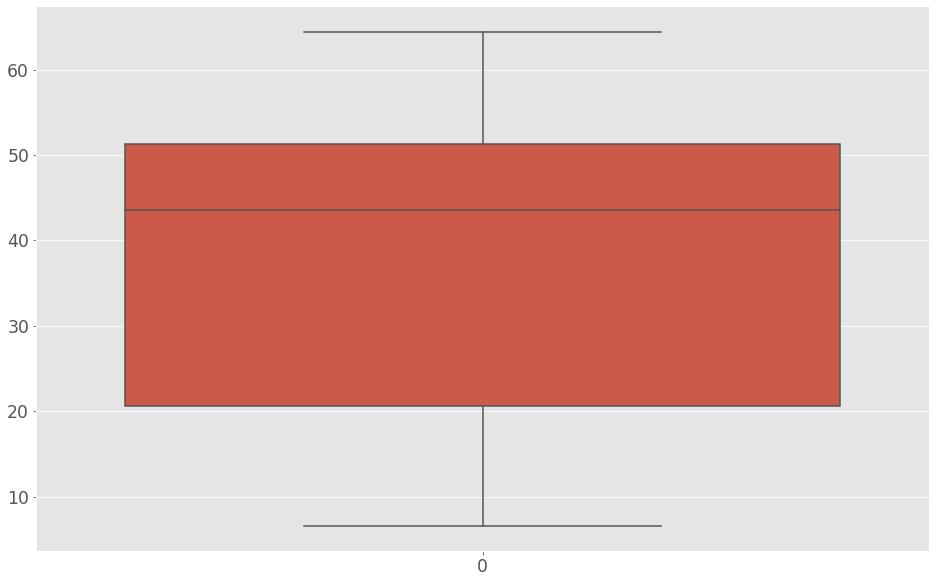

In [19]:
dataset_gdp = dataset['GDPperHead']
print(sns.boxplot(data=dataset_gdp))

In [20]:
Q1 = dataset.GDPperHead.quantile(q=0.25)
Q3 = dataset.GDPperHead.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['GDPperHead'] > lower_bound) & (dataset['GDPperHead'] < upper_bound)]
dataset.shape

(21, 6)

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


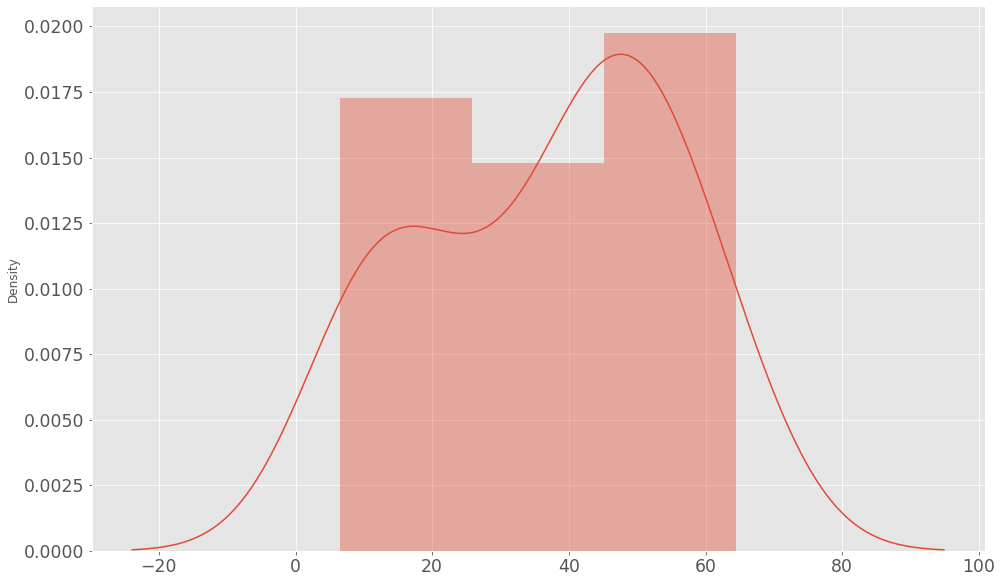

In [21]:
sns.distplot(x=dataset['GDPperHead'])
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


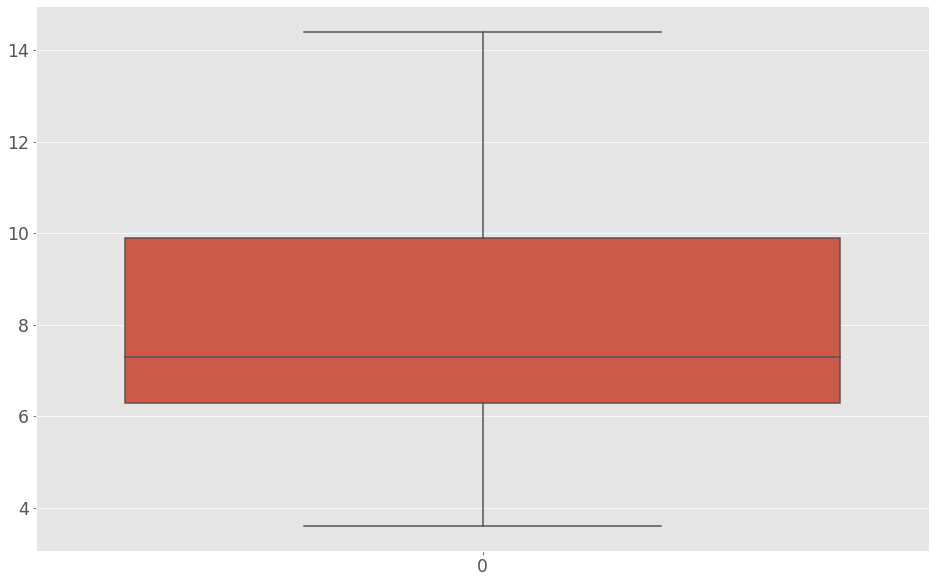

In [22]:
dataset_rate = dataset['UnemploymentRate']
print(sns.boxplot(data=dataset_rate))

In [23]:
Q1 = dataset.UnemploymentRate.quantile(q=0.25)
Q3 = dataset.UnemploymentRate.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['UnemploymentRate'] > lower_bound) & (dataset['UnemploymentRate'] < upper_bound)]
dataset.shape

(21, 6)

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


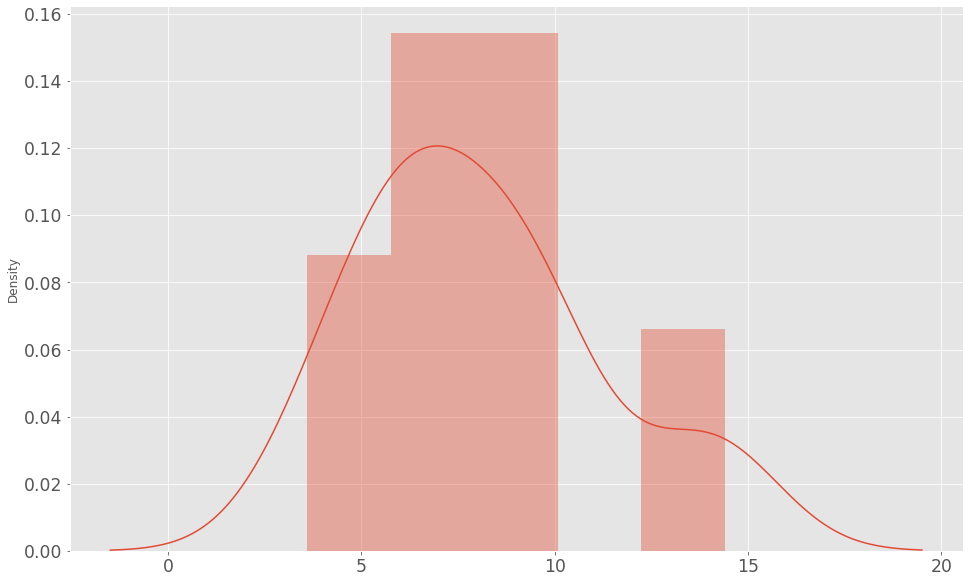

In [24]:
sns.distplot(x=dataset['UnemploymentRate'])
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


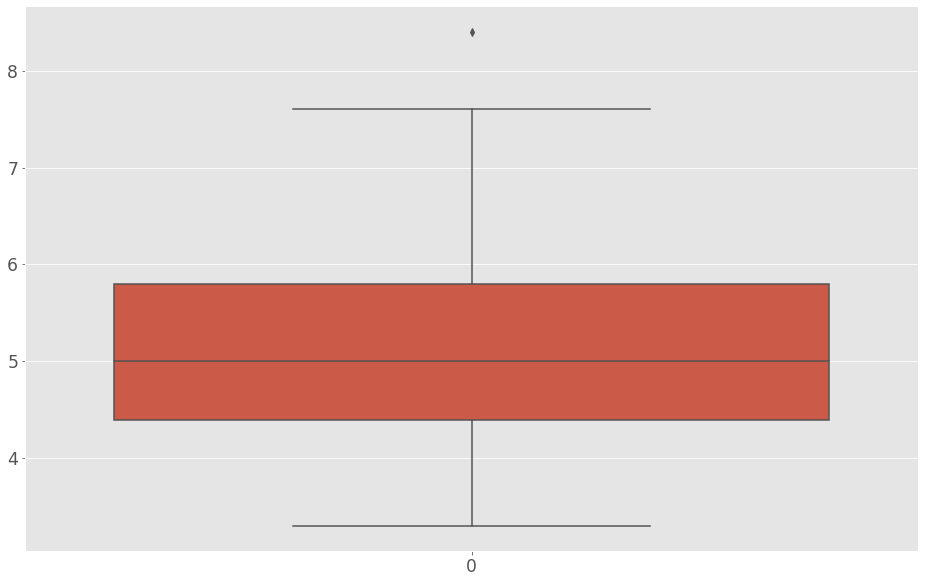

In [25]:
dataset_spend = dataset['EducationSpending']
print(sns.boxplot(data=dataset_spend))

In [26]:
Q1 = dataset.EducationSpending.quantile(q=0.25)
Q3 = dataset.EducationSpending.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['EducationSpending'] > lower_bound) & (dataset['EducationSpending'] < upper_bound)]
dataset.shape

(20, 6)

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


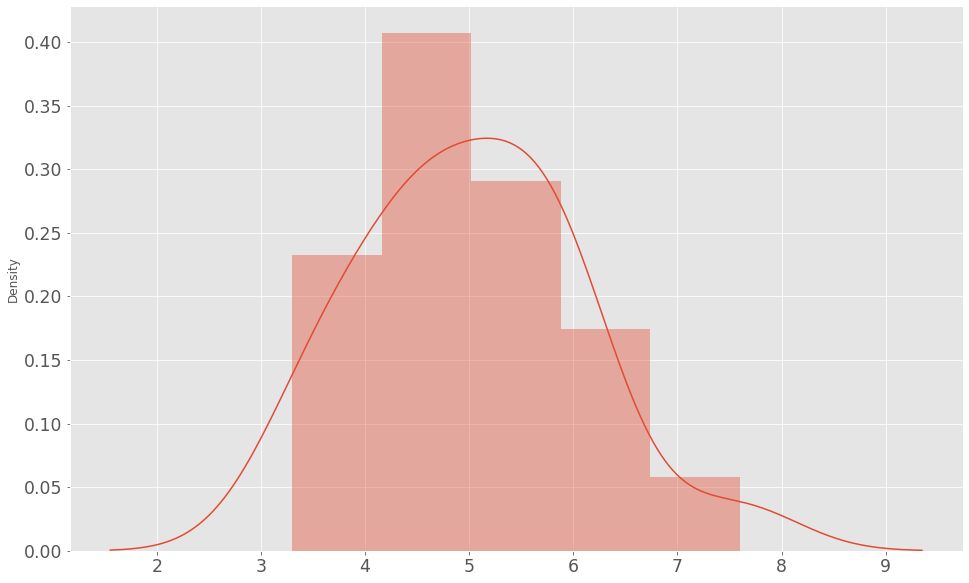

In [27]:
sns.distplot(x=dataset['EducationSpending'])
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


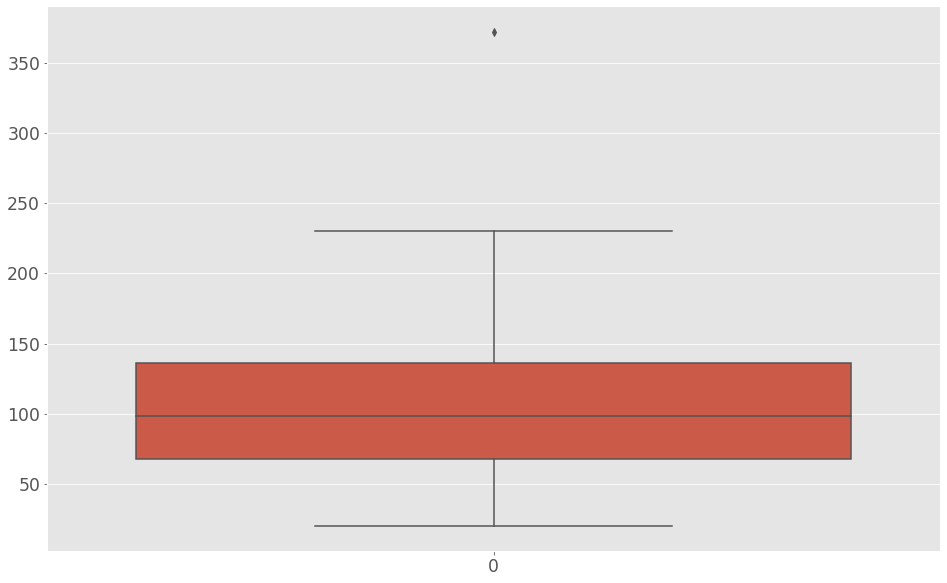

In [28]:
dataset_capita = dataset['SalesPerCapita']
print(sns.boxplot(data=dataset_capita))

In [29]:
Q1 = dataset.SalesPerCapita.quantile(q=0.25)
Q3 = dataset.SalesPerCapita.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['SalesPerCapita'] > lower_bound) & (dataset['SalesPerCapita'] < upper_bound)]
dataset.shape

(19, 6)

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


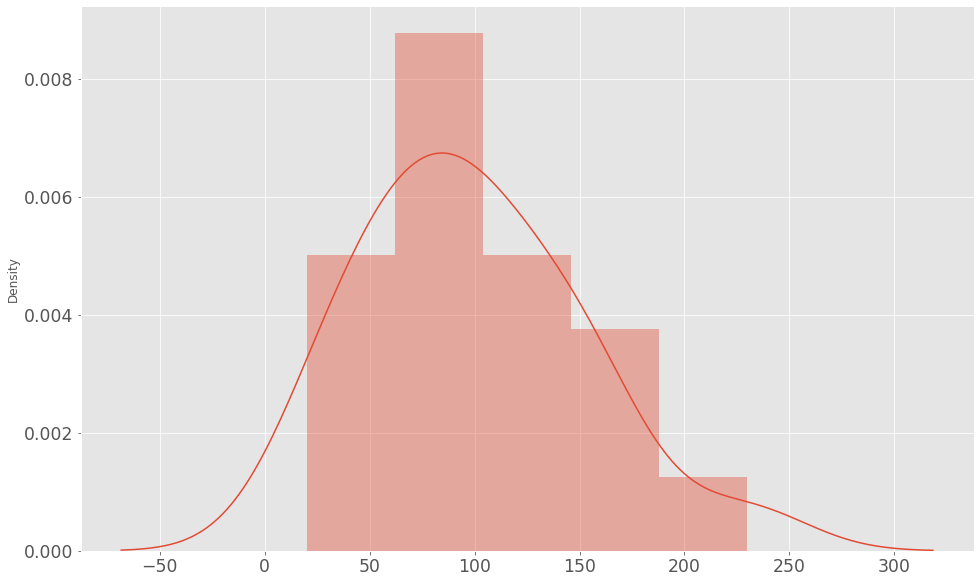

In [30]:
sns.distplot(x=dataset['SalesPerCapita'])
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


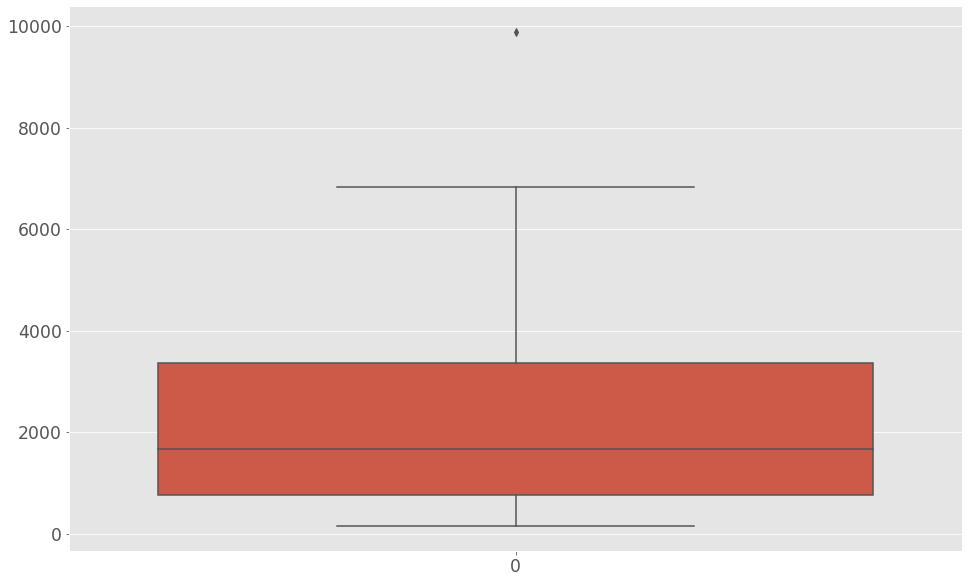

In [31]:
dataset_sales = dataset['ComputerSales']
print(sns.boxplot(data=dataset_sales))

In [32]:
Q1 = dataset.ComputerSales.quantile(q=0.25)
Q3 = dataset.ComputerSales.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
dataset = dataset[(dataset['ComputerSales'] > lower_bound) & (dataset['ComputerSales'] < upper_bound)]
dataset.shape

(18, 6)

/Users/berk.erol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


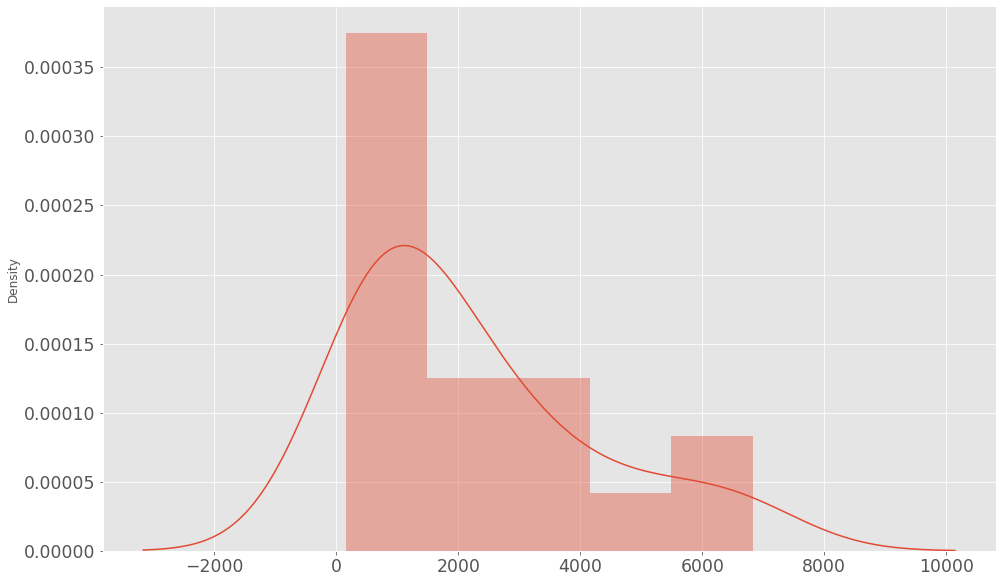

In [33]:
sns.distplot(x=dataset['ComputerSales'])
plt.show();

In [34]:
dataset.skew()

Population           1.120392
GDPperHead          -0.077754
UnemploymentRate     0.641295
EducationSpending    0.531351
SalesPerCapita       0.877960
ComputerSales        1.213185
dtype: float64

In [35]:
dataset = np.log(dataset) #After log transformation, our skewness values decreased
dataset.skew()

Population           0.488673
GDPperHead          -0.771081
UnemploymentRate    -0.174413
EducationSpending   -0.036823
SalesPerCapita      -0.644767
ComputerSales       -0.329904
dtype: float64

<AxesSubplot:>

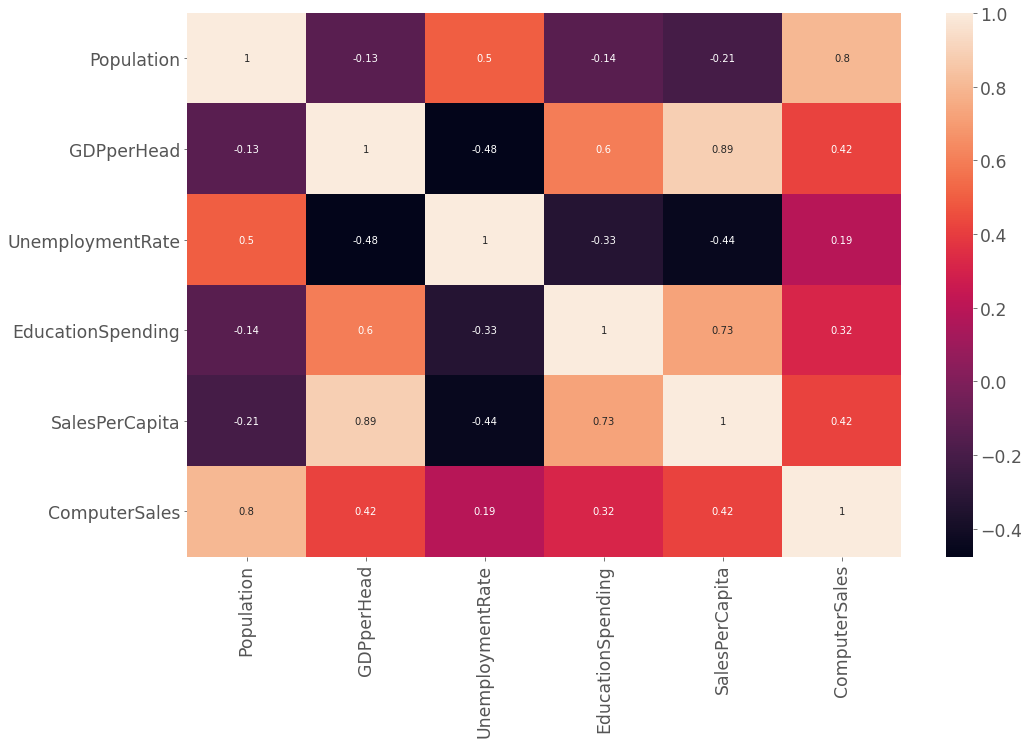

In [36]:
sns.heatmap(dataset.corr(), annot=True) #I created a correlation matrix.

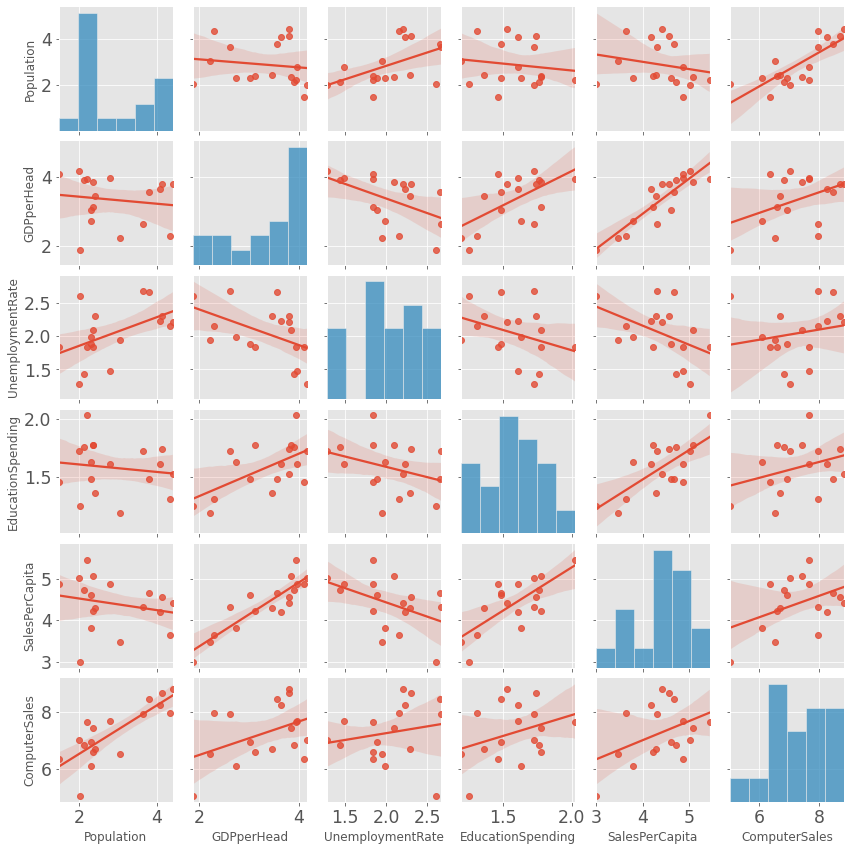

In [37]:
sns.pairplot(dataset,height=2,kind='reg') 
#Another EDA for understanding the linearity between features after preprocesing steps.

In [38]:
column_list = [column for column in dataset[0:]]
print(column_list)

['Population', 'GDPperHead', 'UnemploymentRate', 'EducationSpending', 'SalesPerCapita', 'ComputerSales']


In [120]:
new_data=[] 
def high_corr(data,target):
    for column in column_list:
        if (np.corrcoef(data[column],data[target])[0,1] > 0.5):
            new_data.append([column])
    return new_data
#For exercise purposes I just wanted to create a function 
#for seeing highly correlated features between dependent variables.

In [40]:
high_corr(dataset,"SalesPerCapita")

[['GDPperHead'], ['EducationSpending'], ['SalesPerCapita']]

In [121]:
high_corr(dataset,"ComputerSales")

[['Population'], ['ComputerSales']]

In [42]:
def adjusted_r_squared(R2, data):
    
    d = (1-R2)*(data.shape[0]-1)/(data.shape[0]-data.shape[1]-1) 
    
    return 1-d
#I created a function for calculating Adjusted R-Squared Values.

# Part 3a - Build Linear Regression Model for SalesPerCapita Trial Model

In [43]:
X1a = dataset[['GDPperHead','EducationSpending']].values
y1a = dataset["SalesPerCapita"].values

In [44]:
X1a_train, X1a_test, y1a_train, y1a_test = train_test_split(X1a, y1a, test_size=0.2, random_state=42)
#Our dataset is divided into test and training sets.

In [45]:
steps1a =[('scaler', StandardScaler()),('linear_reg',LinearRegression())]
pipeline1a = Pipeline(steps1a)
#Creating a pipeline is useful for modeling. I included Scaling and Regression within the Pipeline object.

In [46]:
pipeline1a.fit(X1a_train,y1a_train) #I used the training data for our model to fit.

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [47]:
prediction1a = pipeline1a.predict(X1a_test)
prediction1a
#Prediction is made based on the test values.

array([4.9056555 , 4.88732584, 4.7822595 , 4.64575367])

In [48]:
model1a_Rsquared = r2_score(y1a_test,prediction1a)

In [49]:
model1a_Rsquared

0.43322789461680766

In [50]:
model1a_mae = mean_absolute_error(y1a_test,prediction1a)
model1a_mae
#Mean absolute error is calculated.

0.17371387158432983

In [51]:
model1a_exp_var = explained_variance_score(y1a_test,prediction1a)
model1a_exp_var
#Explained variance score is calculated.

0.4525248253049483

In [52]:
model1a_mse = mean_squared_error(y1a_test,prediction1a)
model1a_mse
#Mean squared error is calculated.

0.032610360378478156

In [53]:
model1a_rmse = np.sqrt(model1a_mse)
model1a_rmse
#Root mean squared error is calculated.

0.18058338898824045

In [54]:
model1a_train_set_Rsquared = pipeline1a.score(X1a_train,y1a_train)
model1a_train_set_Rsquared
#R-Squared is calculated for train set.

0.8457558172008498

In [55]:
model1a_test_set_Rsquared = pipeline1a.score(X1a_test,y1a_test)
model1a_test_set_Rsquared
#R-Squared is calculated for test set.

0.43322789461680766

In [56]:
model1a_train_set_adj_R = adjusted_r_squared(model1a_train_set_Rsquared,dataset)
model1a_train_set_adj_R
#Adjusted R-Squared is calculated for train set.

0.7616226265831315

In [57]:
model1a_test_set_adj_R = adjusted_r_squared(model1a_test_set_Rsquared,dataset)
model1a_test_set_adj_R
#Adjusted R-Squared is calculated for test set.

0.12407947349870274

# Part 3a1 - Build Linear Regression Model for SalesPerCapita

In [58]:
X = dataset[['GDPperHead','EducationSpending','ComputerSales','Population','UnemploymentRate']].values
y = dataset["SalesPerCapita"].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Our dataset is divided into test and training sets.

In [60]:
steps =[('scaler', StandardScaler()),('linear_reg',LinearRegression())]
pipeline = Pipeline(steps)
#Creating a pipeline is useful for modeling. I included Scaling and Regression within the Pipeline object.

In [61]:
pipeline.fit(X_train,y_train) #I used the training data for our model to fit.

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [62]:
prediction = pipeline.predict(X_test)
prediction
#Prediction is made based on the test values.

array([4.71984313, 5.07850368, 4.87650417, 4.42040579])

In [63]:
model_Rsquared = r2_score(y_test,prediction)

In [64]:
model_Rsquared

0.9999259055928083

In [65]:
model_mae = mean_absolute_error(y_test,prediction)
model_mae
#Mean absolute error is calculated.

0.001886539104561491

In [66]:
model_exp_var = explained_variance_score(y_test,prediction)
model_exp_var
#Explained variance score is calculated.

0.9999877619717477

In [67]:
model_mse = mean_squared_error(y_test,prediction)
model_mse
#Mean squared error is calculated.

4.263169089662768e-06

In [68]:
model_rmse = np.sqrt(model_mse)
model_rmse
#Root mean squared error is calculated.

0.00206474431580832

In [69]:
model1_train_set_Rsquared = pipeline.score(X_train,y_train)
model1_train_set_Rsquared
#R-Squared is calculated for train set.

0.999966225945647

In [70]:
model1_test_set_Rsquared = pipeline.score(X_test,y_test)
model1_test_set_Rsquared
#R-Squared is calculated for test set.

0.9999259055928083

In [71]:
model1_train_set_adj_R = adjusted_r_squared(model1_train_set_Rsquared,dataset)
model1_train_set_adj_R
#Adjusted R-Squared is calculated for train set.

0.9999478037341817

In [72]:
model1_test_set_adj_R = adjusted_r_squared(model1_test_set_Rsquared,dataset)
model1_test_set_adj_R
#Adjusted R-Squared is calculated for test set.

0.9998854904616128

# Part 3b - Build Linear Regression Model for ComputerSales

In [73]:
dependent2 = ["ComputerSales"]

In [74]:
X2 = dataset.drop(dependent2,axis=1).values
y2 = dataset[dependent2].values

In [75]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [76]:
steps2 =[('scaler', StandardScaler()),('linear_reg',LinearRegression())]
pipeline2 = Pipeline(steps2)

In [77]:
pipeline2.fit(X2_train,y2_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [78]:
prediction2 = pipeline2.predict(X2_test)
prediction2

array([[6.84560646],
       [7.42554937],
       [6.35760584],
       [8.82596595],
       [6.94112846],
       [6.52914165]])

In [79]:
model2_train_set_Rsquared = pipeline2.score(X2_train,y2_train)
model2_train_set_Rsquared
#R-Squared is calculated for train set.

0.9999873839147112

In [80]:
model2_test_set_Rsquared = pipeline2.score(X2_test,y2_test)
model2_test_set_Rsquared
#R-Squared is calculated for test set.

0.9999889282755665

In [81]:
model2_exp_var = explained_variance_score(y2_test,prediction2)
model2_exp_var
#Explained variance score is calculated.

0.9999897286665714

In [82]:
model2_Rsquared = r2_score(y2_test,prediction2)
model2_Rsquared

0.9999889282755665

In [83]:
model2_mae = mean_absolute_error(y2_test,prediction2)
model2_mae
#Mean absolute error is calculated.

0.00232934728990708

In [84]:
model2_mse = mean_squared_error(y2_test,prediction2)
model2_mse
#Mean squared error is calculated.

7.454723749190645e-06

In [85]:
model2_rmse = np.sqrt(model2_mse)
model2_rmse
#Root mean squared error is calculated.

0.002730333999566838

In [86]:
model2_train_set_adj_R = adjusted_r_squared(model2_train_set_Rsquared,dataset)
model2_train_set_adj_R
#Adjusted R-Squared is calculated for train set.

0.9999805024136446

In [87]:
model2_test_set_adj_R = adjusted_r_squared(model2_test_set_Rsquared,dataset)
model2_test_set_adj_R
#Adjusted R-Squared is calculated for test set.

0.9999828891531483

# Part 3b1 - Build Linear Regression Model for ComputerSales Trial Model

In [88]:
dependent3 = ["ComputerSales"]

In [89]:
X3 = dataset[["Population", "GDPperHead"]].values
y3 = dataset[dependent2].values

In [90]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [91]:
steps3 =[('scaler', StandardScaler()),('linear_reg',LinearRegression())]
pipeline3 = Pipeline(steps3)

In [92]:
pipeline3.fit(X3_train,y3_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [93]:
prediction3 = pipeline3.predict(X3_test)
prediction3

array([[6.99146487],
       [7.16787225],
       [6.51827298],
       [9.13514571],
       [6.48091319],
       [6.56120709]])

In [94]:
model3_train_set_Rsquared = pipeline3.score(X3_train,y3_train)
model3_train_set_Rsquared
#R-Squared is calculated for train set.

0.9289041884765656

In [95]:
model3_test_set_Rsquared = pipeline3.score(X3_test,y3_test)
model3_test_set_Rsquared
#R-Squared is calculated for test set.

0.8968729786769557

In [96]:
model3_exp_var = explained_variance_score(y3_test,prediction3)
model3_exp_var
#Explained variance score is calculated.

0.8971021182422418

In [97]:
model3_Rsquared = r2_score(y3_test,prediction3)
model3_Rsquared

0.8968729786769557

In [98]:
model3_mae = mean_absolute_error(y3_test,prediction3)
model3_mae
#Mean absolute error is calculated.

0.22601100004839406

In [99]:
model3_mse = mean_squared_error(y3_test,prediction3)
model3_mse
#Mean squared error is calculated.

0.06943665005889675

In [100]:
model3_rmse = np.sqrt(model3_mse)
model3_rmse
#Root mean squared error is calculated.

0.26350834912559556

In [101]:
model3_train_set_adj_R = adjusted_r_squared(model3_train_set_Rsquared,dataset)
model3_train_set_adj_R
#Adjusted R-Squared is calculated for train set.

0.8901246549183287

In [102]:
model3_test_set_adj_R = adjusted_r_squared(model3_test_set_Rsquared,dataset)
model3_test_set_adj_R
#Adjusted R-Squared is calculated for test set.

0.8406218761371134

# Part 4 - Compare Different Models' Performance

In [103]:
data1 = [model1_train_set_Rsquared,model1a_train_set_Rsquared,model2_train_set_Rsquared,model3_train_set_Rsquared] #I did pandas manipulations to create a dataframe.

In [104]:
table1 = pd.DataFrame(data1,columns=['R-Squared for Train Set'],index=['Model for SalesPerCapita','Trial Model for SalesPerCapita','Model for ComputerSales','Trial Model for ComputerSales'])

In [105]:
data2 = [model1_test_set_Rsquared,model1a_test_set_Rsquared,model2_test_set_Rsquared,model3_test_set_Rsquared]

In [106]:
table2 = pd.DataFrame(data2,columns=['R-Squared for Test Set'],index=['Model for SalesPerCapita','Trial Model for SalesPerCapita','Model for ComputerSales','Trial Model for ComputerSales'])

In [107]:
data2a = [model1_train_set_adj_R,model1a_train_set_adj_R,model2_train_set_adj_R,model3_train_set_adj_R]

In [108]:
table2a = pd.DataFrame(data2a,columns=['Adjusted R-Squared for Train Set'],index=['Model for SalesPerCapita','Trial Model for SalesPerCapita','Model for ComputerSales','Trial Model for ComputerSales'])

In [109]:
data2b = [model1_test_set_adj_R,model1a_test_set_adj_R,model2_test_set_adj_R,model3_test_set_adj_R]

In [110]:
table2b = pd.DataFrame(data2b,columns=['Adjusted R-Squared for Test Set'],index=['Model for SalesPerCapita','Trial Model for SalesPerCapita','Model for ComputerSales','Trial Model for ComputerSales'])

In [111]:
data3 = [model_exp_var,model1a_exp_var,model2_exp_var,model3_exp_var]

In [112]:
table3 = pd.DataFrame(data3,columns=['Explained Variance Score'],index=['Model for SalesPerCapita','Trial Model for SalesPerCapita','Model for ComputerSales','Trial Model for ComputerSales'])

In [113]:
data4 = [model_mae,model1a_mae,model2_mae,model3_mae]

In [114]:
table4 = pd.DataFrame(data4,columns=['Mean Absolute Error'],index=['Model for SalesPerCapita','Trial Model for SalesPerCapita','Model for ComputerSales','Trial Model for ComputerSales'])

In [115]:
data5 = [model_rmse,model1a_rmse,model2_rmse,model3_rmse]

In [116]:
table5 = pd.DataFrame(data5,columns=['Root Mean Squared Error'],index=['Model for SalesPerCapita','Trial Model for SalesPerCapita','Model for ComputerSales','Trial Model for ComputerSales'])

In [117]:
main_table = pd.concat((table1,table2,table2a,table2b,table3,table4,table5),join='inner',axis=1)

# Part 5 - Overall Result Table and Summary of All the Assignment

In [118]:
main_table

,R-Squared for Train Set,R-Squared for Test Set,Adjusted R-Squared for Train Set,Adjusted R-Squared for Test Set,Explained Variance Score,Mean Absolute Error,Root Mean Squared Error
Model for SalesPerCapita,0.999966,0.999926,0.999948,0.999885,0.999988,0.001887,0.002065
Trial Model for SalesPerCapita,0.845756,0.433228,0.761623,0.124079,0.452525,0.173714,0.180583
Model for ComputerSales,0.999987,0.999989,0.999981,0.999983,0.999990,0.002329,0.002730
Trial Model for ComputerSales,0.928904,0.896873,0.890125,0.840622,0.897102,0.226011,0.263508


There assumptions that we have to meet when we use Linear Regression model like lineariy, having not outliers, not having highly correlated variables, having normal distribution and variables that are on the same scale. 
Firstly, I dropped outliers and then used skew method to see the skewness of my dataset. There are skewed variables(long right tail); so I used log transformation for creating a normal distribution. Then I used Standard Scaler to have all my data in the same scale. 
After using all of the independent features(excluding country feature), I achieved an accuracy score of 0.99 and adjusted R-Squared is almost the same with R-squared value and this is the proof that the model is robust.